# CSW DATASET
* click [here](https://drive.google.com/drive/u/0/folders/1qYP5zcY7i9ALt0d_SldA06ouiPHp4wpF) to download

In [1]:
import os, re
import pandas as pd
import numpy as np
import json

from matplotlib import pyplot as plt
import seaborn as sns
sns.set_context('talk')
%matplotlib inline
plt.rcParams['font.size'] = 22

%load_ext autoreload
%reload_ext autoreload
%autoreload 2

In [2]:
from humanUtils import *
## this file contains most of the logic for loading and processing database
from cswHumanDatabase import load_final_df, load_dfs


# load thresholded dataset

In [5]:
## load a thresholded dateset
cond = 'blocked_rep'
thresh = 0.9
df = load_final_df(cond,threshold=thresh)


-loading code version: csw1000block40.04.07.19
N = 63 subjects


In [6]:
df

type   qtype state fromnode true_tonode  \
subjnum block story depth                                                     
0       0     0     1     9     question  transQ   NaN   NODE12      NODE22   
              1     2     30    question  transQ   NaN   NODE21      NODE31   
              2     1     45    question  transQ   NaN   NODE12      NODE22   
                    2     49    question  transQ   NaN   NODE22      NODE32   
              3     2     68    question  transQ   NaN   NODE22      NODE32   
...                                  ...     ...   ...      ...         ...   
60      4     197   1     3594  question  transQ   NaN   NODE11      NODE22   
                    2     3598  question  transQ   NaN   NODE22      NODE31   
              198   1     3611  question  transQ   NaN   NODE11      NODE21   
                    2     3615  question  transQ   NaN   NODE21      NODE31   
              199   2     3632  question  transQ   NaN   NODE22      NODE32   

                               false_tonode  rfc  \
subjnum block story depth                          
0       0     0     1     9          NODE21  NaN   
              1     2     30         NODE32  NaN   
              2     1     45         NODE21  NaN   
                    2     49         NODE31  NaN   
              3     2     68         NODE31  NaN   
...                                     ...  ...   
60      4     197   1     3594       NODE21  NaN   
                    2     3598       NODE32  NaN   
              198   1     3611       NODE22  NaN   
                    2     3615       NODE32  NaN   
              199   2     3632       NODE31  NaN   

                                                      true_rfc  \
subjnum block story depth                                        
0       0     0     1     9        subject-Diana_location-deep   
              1     2     30       subject-Peter_location-deep   
              2     1     45     subject-Cynthia_location-deep   
                    2     49     subject-Cynthia_location-deep   
              3     2     68        subject-Kyle_location-deep   
...                                                        ...   
60      4     197   1     3594  subject-Justin_location-jungle   
                    2     3598  subject-Justin_location-jungle   
              198   1     3611      subject-Noah_location-deep   
                    2     3615      subject-Noah_location-deep   
              199   2     3632  subject-Lawrence_location-deep   

                                                     false_rfc  \
subjnum block story depth                                        
0       0     0     1     9        subject-Diana_location-deep   
              1     2     30       subject-Peter_location-deep   
              2     1     45     subject-Cynthia_location-deep   
                    2     49     subject-Cynthia_location-deep   
              3     2     68        subject-Kyle_location-deep   
...                                                        ...   
60      4     197   1     3594  subject-Justin_location-jungle   
                    2     3598  subject-Justin_location-jungle   
              198   1     3611      subject-Noah_location-deep   
                    2     3615      subject-Noah_location-deep   
              199   2     3632  subject-Lawrence_location-deep   

                                response_right  true_on_right  \
subjnum block story depth                                       
0       0     0     1     9              False           True   
              1     2     30              True           True   
              2     1     45             False          False   
                    2     49             False          False   
              3     2     68             False           True   
...                                        ...            ...   
60      4     197   1     3594           False          False   
                    2     35

## group level plots

In [4]:
## operating pandas dataframes
compute_mean = lambda df_: df_.groupby(['story']).correct_response.mean()
compute_stderr = lambda df_: df_.groupby(['story']).correct_response.std(
  ) / np.sqrt(len(df_.index.get_level_values('subjnum').unique()))


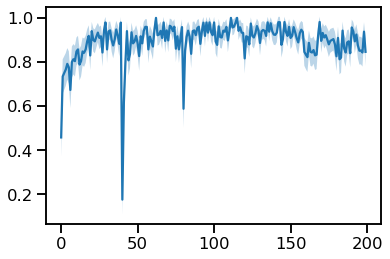

In [5]:
M = compute_mean(df)
S = compute_stderr(df)
plt.plot(M)
plt.fill_between(np.arange(len(M)),M-S,M+S,alpha=0.3)

### separate steps 2 and 3

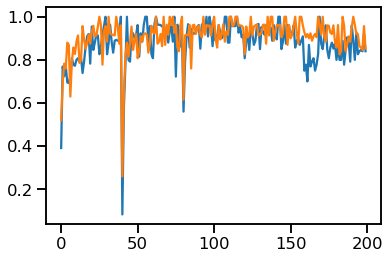

In [6]:
df2 = df[df.index.get_level_values('depth')==1]
df3 = df[df.index.get_level_values('depth')==2]

plt.plot(compute_mean(df2))
plt.plot(compute_mean(df3))

### colored background

In [7]:
## load a thresholded dateset
cond = 'blocked'
thresh = 0.9
df = load_final_df(cond,threshold=thresh)


-loading code version: RT40B1000cl
N = 50 subjects


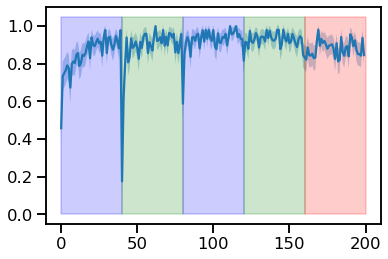

In [8]:
## compute mean and stderr
M = compute_mean(df)
S = compute_stderr(df)
## plot with error shading
ax = plt.gca()
ax.plot(M)
ax.fill_between(np.arange(len(M)),M-S,M+S,alpha=0.3)
## make nice background
cL = ['blue','green','blue','green','red']
for idx in range(5):
  ax.fill_between(np.arange(40*idx,41+40*idx),0,1.05,color=cL[idx],alpha=0.2)

## subject level plots

### iterate over subjects, compute sliding window accuracy

In [9]:
# one subject at a time
for sidx,sub_df in df.groupby(['subjnum']):
  sub_acc = mov_avg(sub_df.correct_response.values,window=10)

In [10]:
# for all subjects at once
mov_avg_window = 10
sub_acc_series = df.groupby(['subjnum']).correct_response.apply(mov_avg,mov_avg_window)
type(sub_acc_series),'N=',len(sub_acc_series)

(pandas.core.series.Series, 'N=', 33)

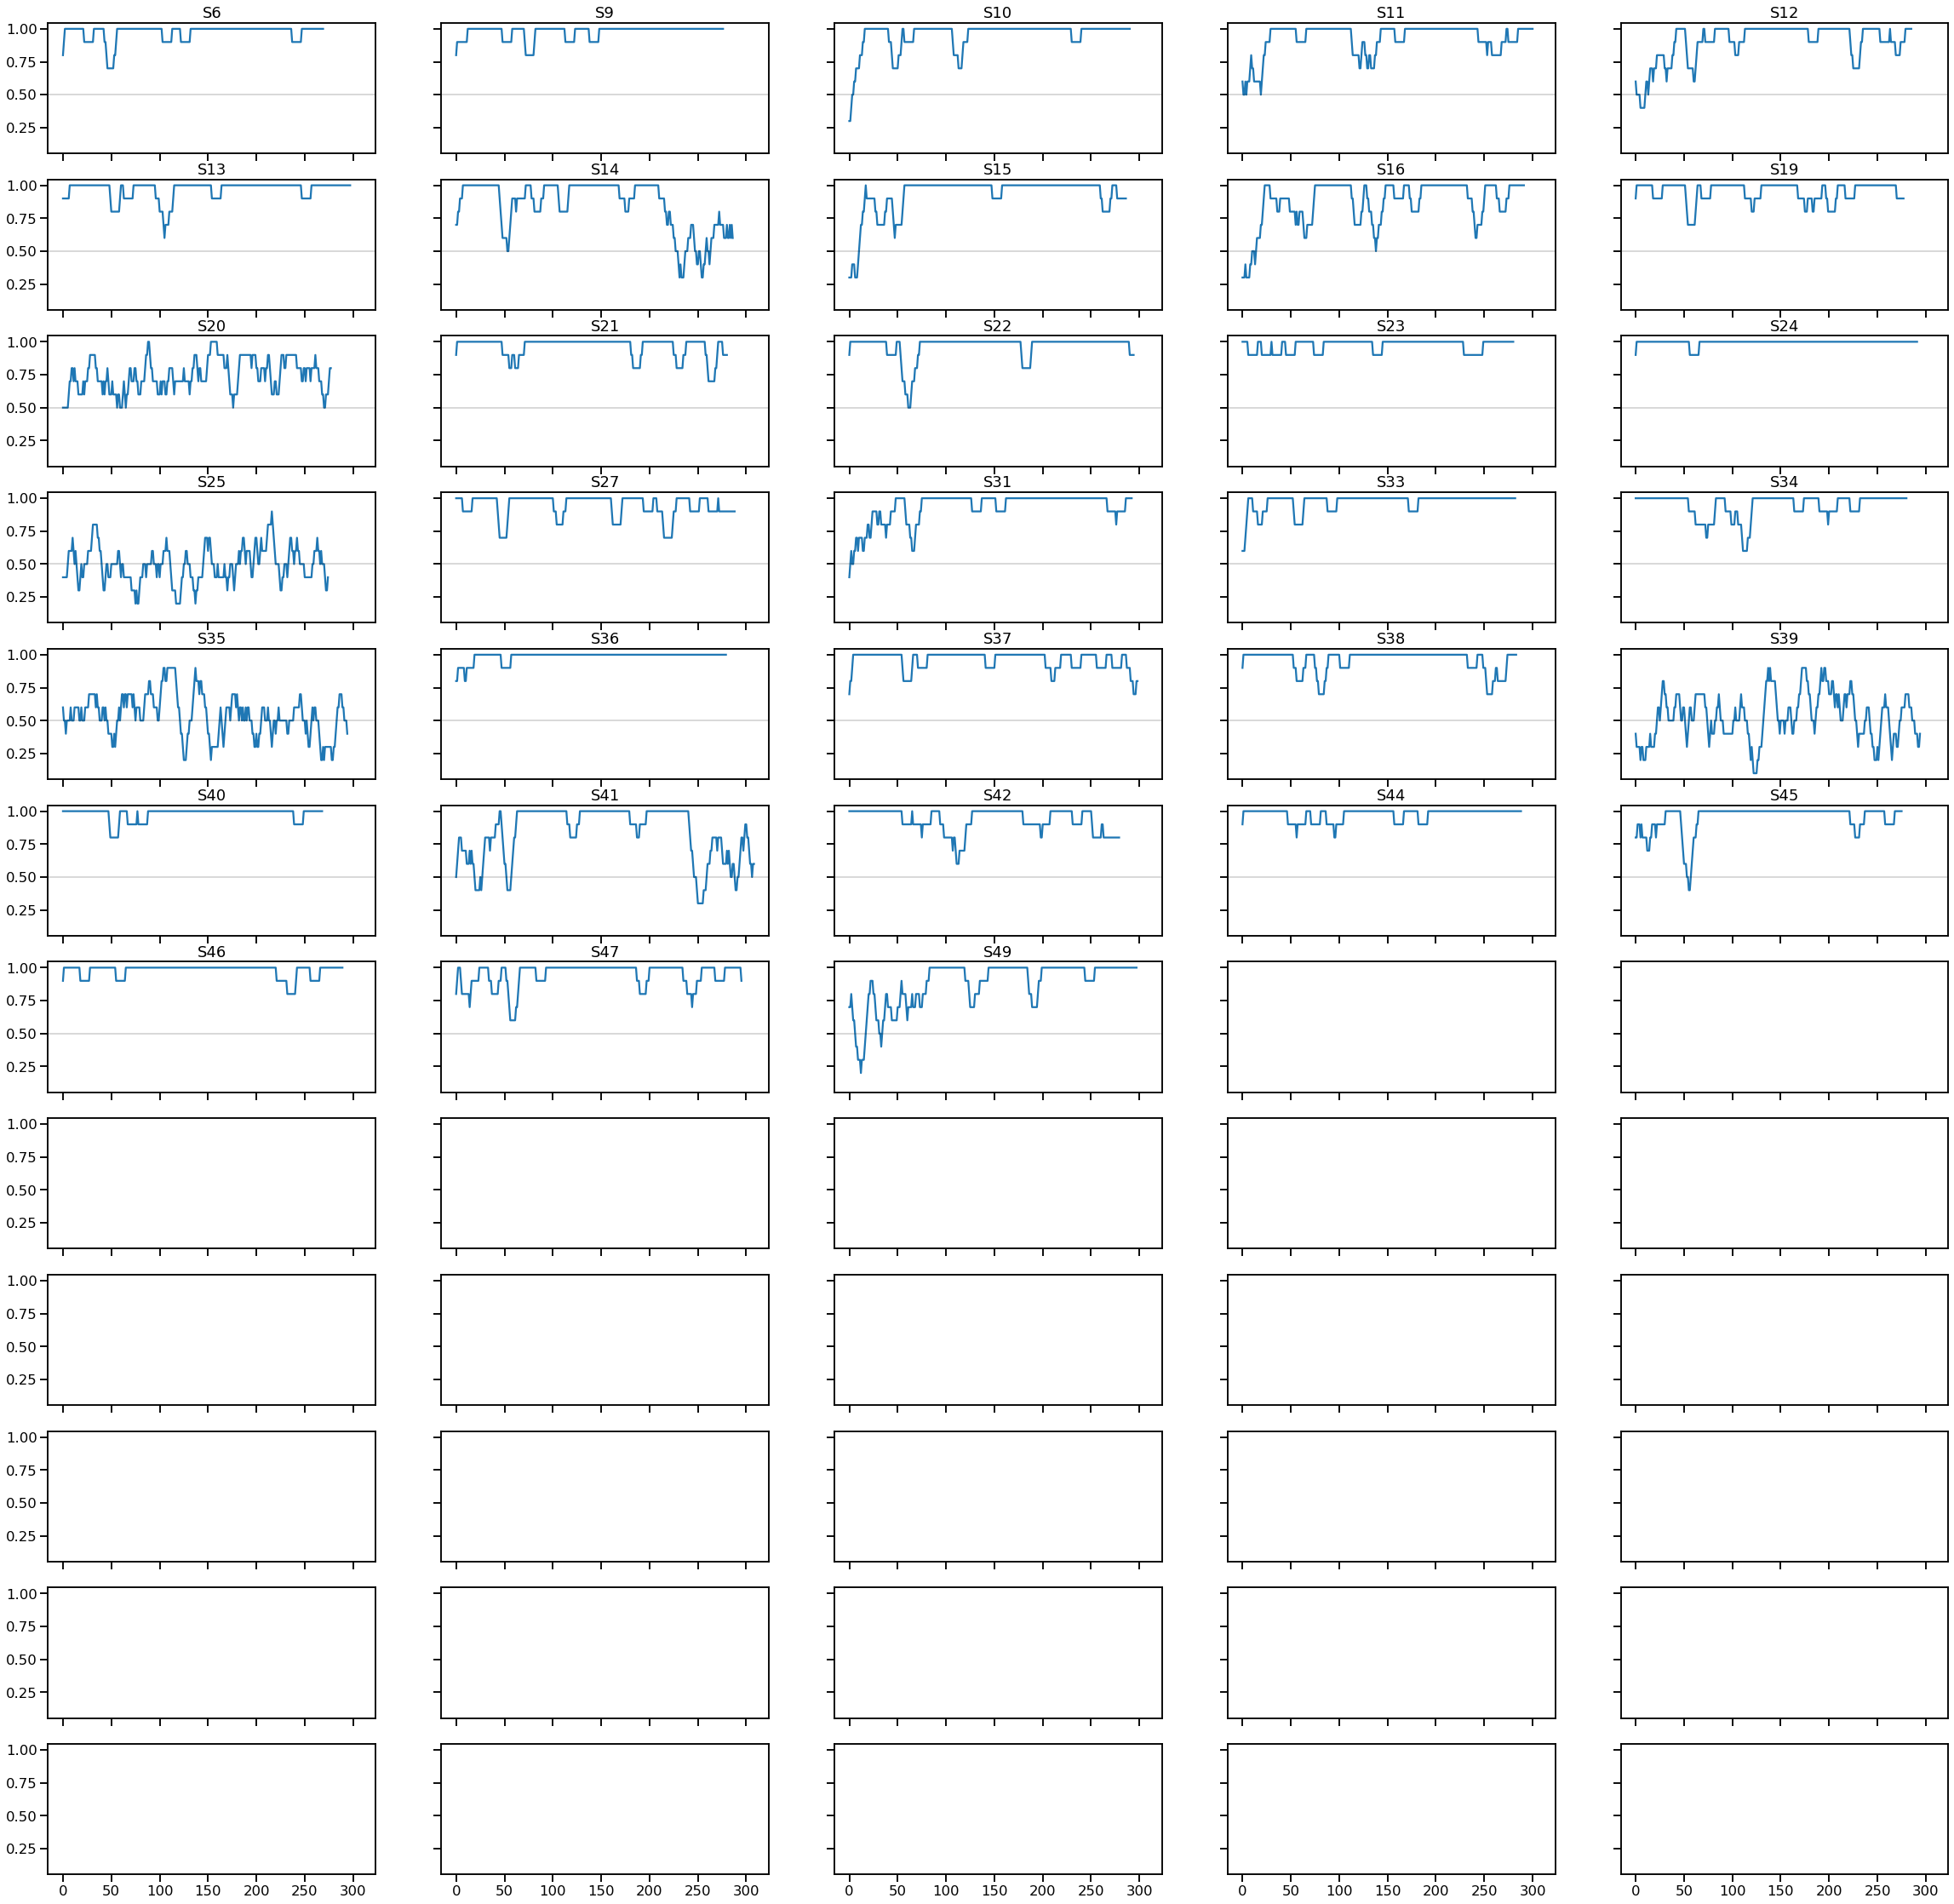

In [11]:
fg,axar = plt.subplots(12,5,figsize=(40,40),sharey=True,sharex=True);axar=axar.reshape(-1)

for idx in range(len(sub_acc_series)):
  ax=axar[idx]
  sub_acc=sub_acc_series.iloc[idx]
  ax.set_title('S%i'%sub_acc_series.index[idx])
  ax.plot(sub_acc)
  ax.axhline(0.5,c='k',lw=.3)


# stats

In [12]:
from scipy.stats import ttest_rel,ttest_ind

### test performance difference between conditions

In [13]:
cond1,cond2 = 'interleaved','interleaved_rep'
df1 = load_final_df(cond1)
df2 = load_final_df(cond2)


-loading code version: RT01B1000cl
N = 55 subjects

-loading code version: csw1000block01.04.25.19
N = 56 subjects


In [14]:
get_test_df = lambda df: df[df.index.get_level_values('block') == 4]

In [15]:
sub_testacc_df1 = get_test_df(df1).groupby(['subjnum']).correct_response.mean()
sub_testacc_df2 = get_test_df(df2).groupby(['subjnum']).correct_response.mean()
ttest_ind(sub_testacc_df1,sub_testacc_df2)

Ttest_indResult(statistic=-1.2008384764920985, pvalue=0.23445613558147502)

### interleaved timestep 2 vs 3 

In [16]:
df1 = load_final_df('interleaved')


-loading code version: RT01B1000cl
N = 55 subjects


In [17]:
get_tstep_df = lambda df,tstep: df[df.index.get_level_values('depth') == tstep]

In [18]:
# step 1
sub_testacc_step1 = get_tstep_df(get_test_df(df1),1
                  ).groupby(['subjnum']).correct_response.mean()
# step 2
sub_testacc_step2 = get_tstep_df(get_test_df(df1),2
                  ).groupby(['subjnum']).correct_response.mean()


In [19]:
ttest_rel(sub_testacc_step1,sub_testacc_step2)

Ttest_relResult(statistic=-2.9987191842997314, pvalue=0.004762443651739155)